<a href="https://colab.research.google.com/github/Aimanfatima9/mnist_handwritten/blob/main/cs182011_assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Assignment 01**

Submitted by: Aiman Fatima (CS182011)

# **MNIST Handwritten Digit Classification**

Single digit classification from 0 to 9

# **Importing Libraries**

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


Loading Dataset from Keras
Dataset contains 60,000 images for training and 10,000 images for testing.

Size of each image is 28*28 pixel

In [6]:
digits_mnist = tf.keras.datasets.mnist



In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
len(x_train),len(x_test)


(60000, 10000)

In [9]:
(x_train.shape)

(60000, 28, 28)

## **Plotting**
Verifying the class labels by visually plotting them.

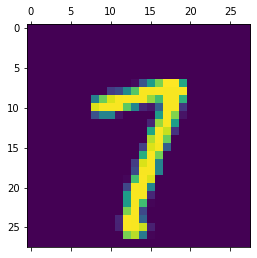

In [26]:
plt.matshow(x_train[96])

In [30]:
#(x_train[:5]) 

In [12]:
(y_train[:5])

array([5, 0, 4, 1, 9], dtype=uint8)

# **Data Pre-Processing**
Grayscale image are in the range of 0-255 pixels. We will scale them between 0-1.

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [29]:
#x_train[0]

# **Compile the Model**
First layer will have input of 784 neurons as image size is 28*28 (784 pixels) so one neuron for one pixel.

Second layer is hidden layer having activation function of relu. It has 128 neurons.

Third layer is output layer which will contain 10 neurons as we are classifying digits in the range of 0-9.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Training the Model**
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [17]:
model.fit(x_train,y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2546 - accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1138 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0584 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0468 - accuracy: 0.9852


# **Evaluating the Model**
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar." (https://keras.io/models/sequential/)

In [18]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0779 - accuracy: 0.9763
Test accuracy: 0.9763000011444092


## **Preditctions**

In [19]:
predictions = model.predict(x_test)

In [20]:
predictions[0]

array([4.3533170e-08, 9.6071373e-09, 5.1903612e-06, 1.1179259e-03,
       1.9574331e-10, 3.3538748e-07, 1.4194089e-09, 9.9887019e-01,
       4.3493751e-06, 1.9062178e-06], dtype=float32)

In [21]:
np.argmax(predictions[0])

7

In [22]:
y_test[0]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Verifying the Predictions**
We will verify our model predictions by comparing it with testing dataset. For that, we will predict 4 classes and see the results.

In [23]:
for i in range(4):
  print(np.argmax(predictions[i]))

7
2
1
0


In [24]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

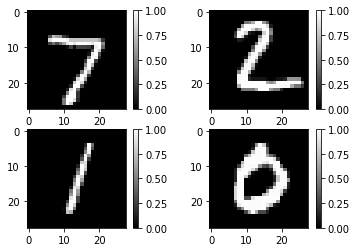

In [28]:
fig = plt.figure()
rows = 2
columns = 2
for i in range(4):
  fig.add_subplot(rows, columns, i + 1)
  plt.imshow(x_test[i], cmap='gray')
  plt.colorbar()
plt.show()